In [1]:
!pip install dataprep

In [18]:
!pip install klib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [4]:
airline = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name="data")
airline.tail()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0

In [5]:
airline.drop(['ID#'], axis=1, inplace=True)
airline.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [6]:
for i in airline.columns:
    print(i,":",len(airline[i].unique()))
    print('-'*50)

Balance : 3904
--------------------------------------------------
Qual_miles : 164
--------------------------------------------------
cc1_miles : 5
--------------------------------------------------
cc2_miles : 3
--------------------------------------------------
cc3_miles : 5
--------------------------------------------------
Bonus_miles : 2734
--------------------------------------------------
Bonus_trans : 57
--------------------------------------------------
Flight_miles_12mo : 343
--------------------------------------------------
Flight_trans_12 : 35
--------------------------------------------------
Days_since_enroll : 2820
--------------------------------------------------
Award? : 2
--------------------------------------------------


In [7]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [8]:
airline.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [9]:
airline.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

DataPrep Report
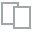
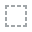
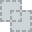
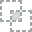
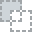
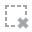
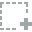
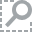
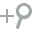
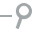
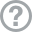
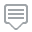
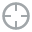
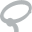
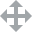
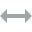
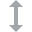
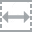
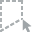
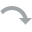
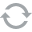
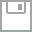
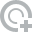
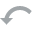
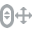
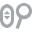
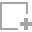
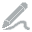
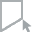
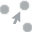
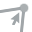
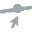

In [10]:
from dataprep.eda import create_report
create_report(airline)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [12]:
airline.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [13]:
for i in ['Balance', 'Qual_miles','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12','Days_since_enroll']:
    airline[i] = scaler.fit_transform(airline[[i]])
airline.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299          1          1          1    -0.702786   
1 -0.539457   -0.186299          1          1          1    -0.701088   
2 -0.320031   -0.186299          1          1          1    -0.539253   
3 -0.583799   -0.186299          1          1          1    -0.689286   
4  0.239678   -0.186299          4          1          1     1.083121   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0    -1.104065          -0.328603        -0.362168           1.395454       0  
1    -0.999926          -0.328603        -0.362168           1.379957       0  
2    -0.791649          -0.328603        -0.362168           1.411920       0  
3    -1.104065          -0.328603        -0.362168           1.372208       0  
4     1.499394           1.154932         0.692490           1.363975       1

In [14]:
px.box(airline)

In [15]:
for i in airline.columns:
    q1 = airline[i].quantile(0.25)
    q3 = airline[i].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    airline = airline[~(airline[i] > upper_limit) | (airline[i] < lower_limit)]
airline.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299          1          1          1    -0.702786   
1 -0.539457   -0.186299          1          1          1    -0.701088   
2 -0.320031   -0.186299          1          1          1    -0.539253   
3 -0.583799   -0.186299          1          1          1    -0.689286   
5 -0.567483   -0.186299          1          1          1    -0.709992   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0    -1.104065          -0.328603        -0.362168           1.395454       0  
1    -0.999926          -0.328603        -0.362168           1.379957       0  
2    -0.791649          -0.328603        -0.362168           1.411920       0  
3    -1.104065          -0.328603        -0.362168           1.372208       0  
5    -1.208203          -0.328603        -0.362168           1.367365       0

In [19]:
import klib
klib.corr_mat(airline)

In [20]:
corr = airline.corr()
px.imshow(corr,text_auto=True)

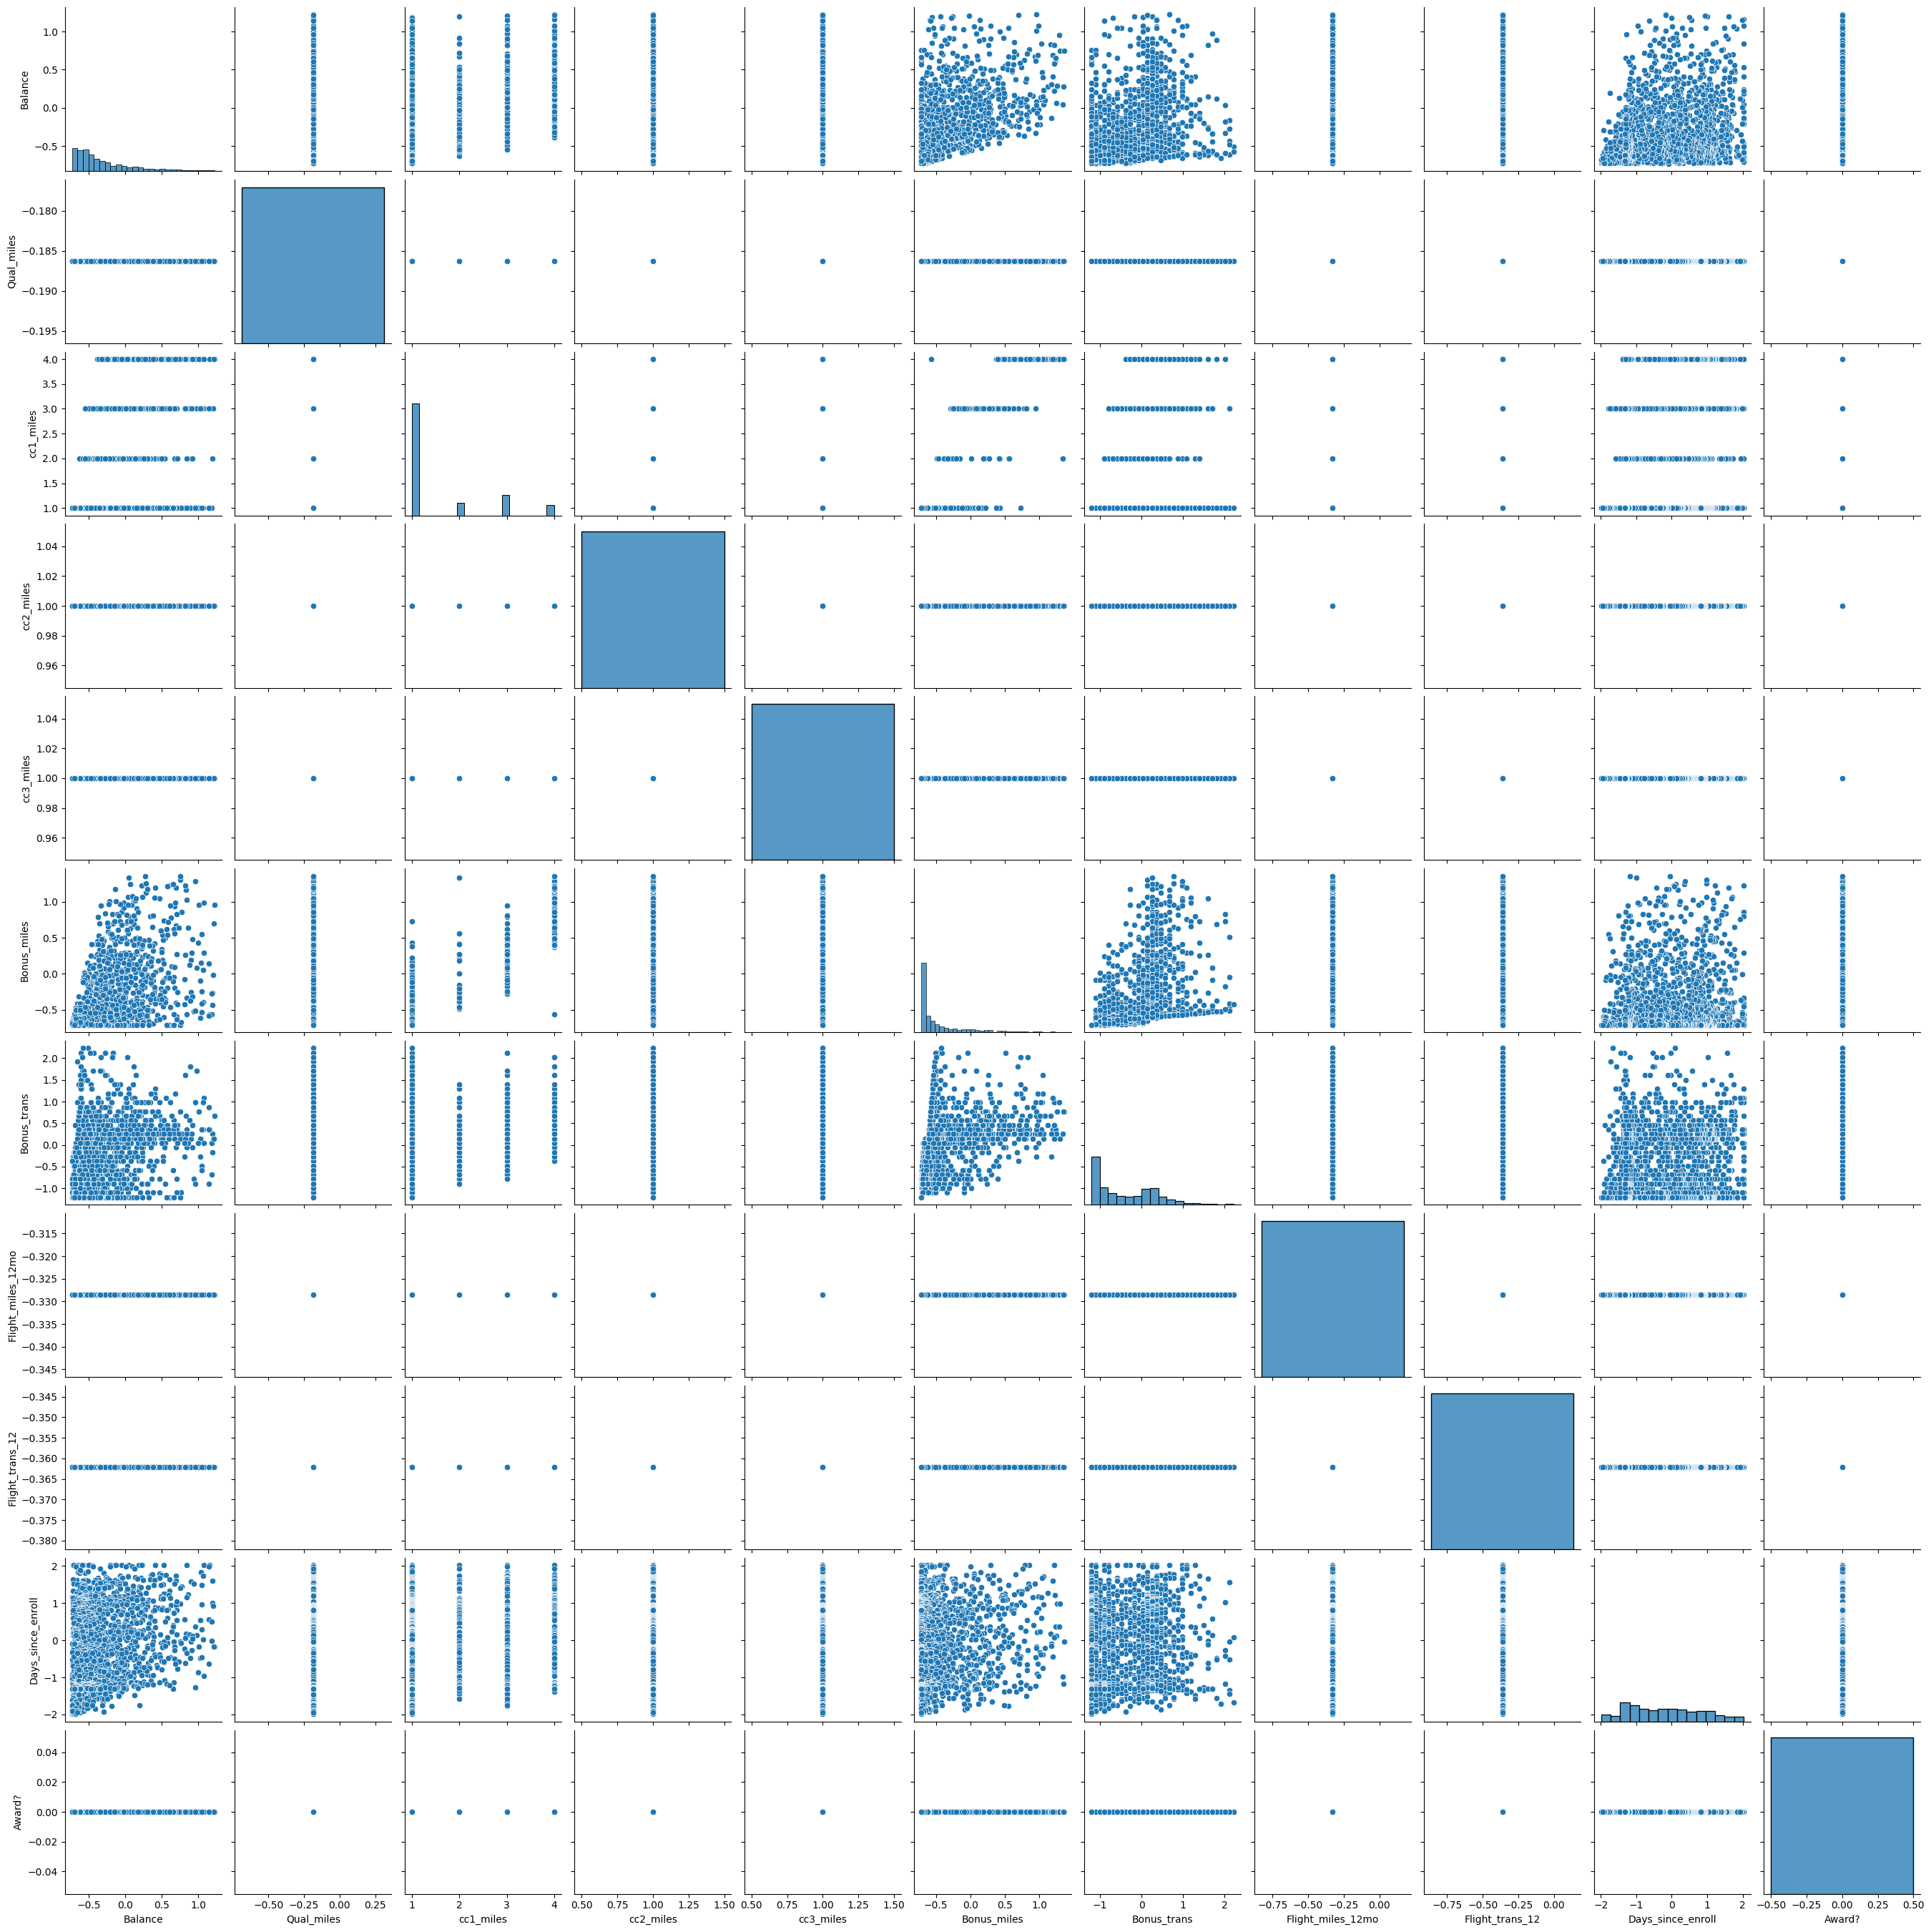

In [21]:
import seaborn as sns
sns.pairplot(airline)

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

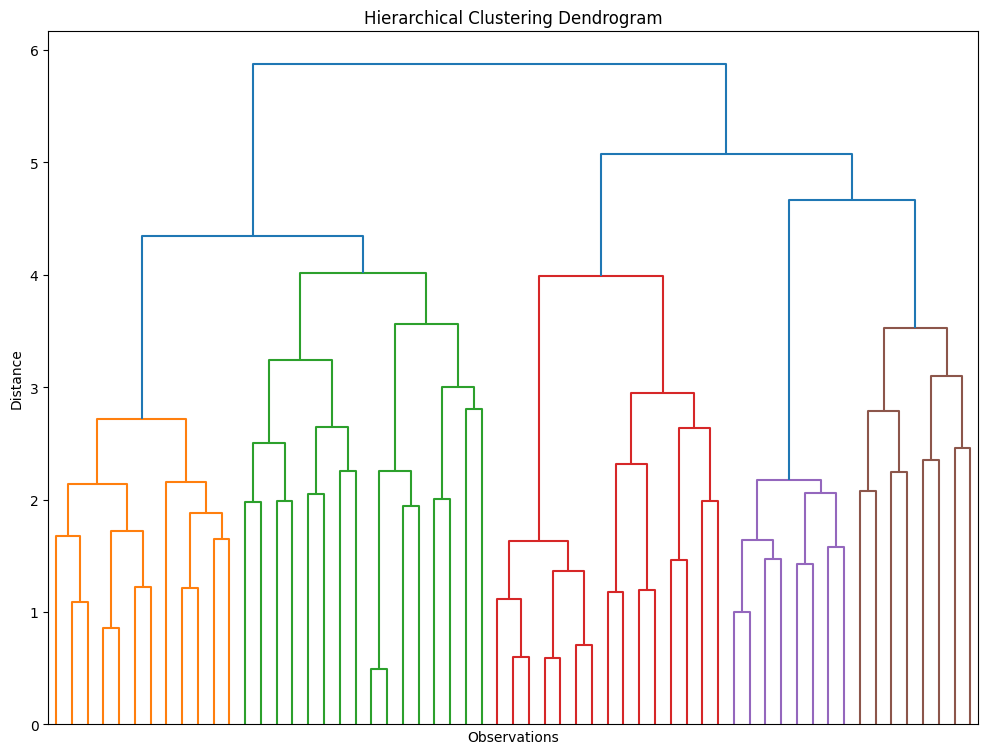

In [23]:
hier_clust = linkage(airline, method = 'complete')
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

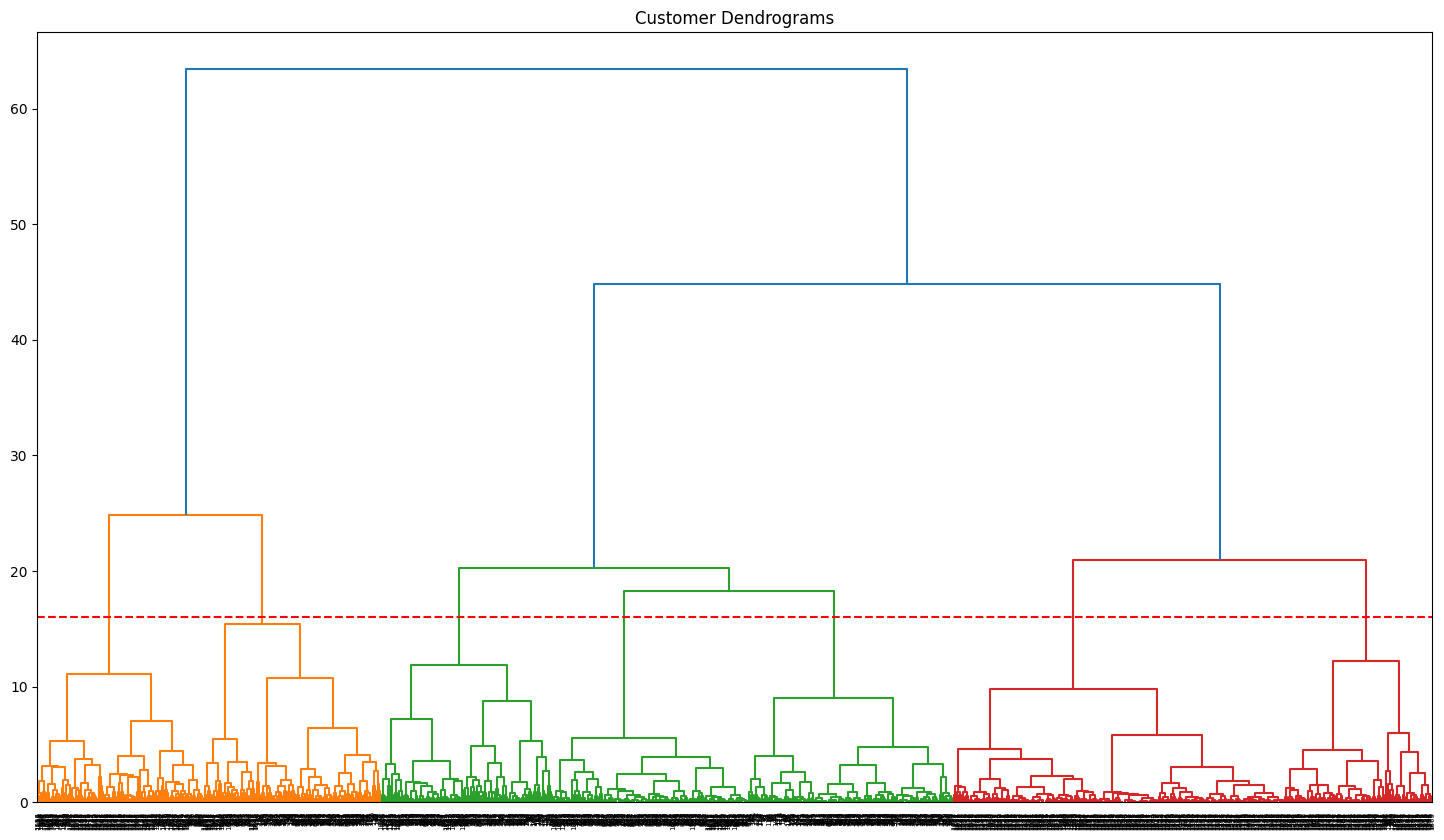

In [24]:
# Fit the hierarchical clustering model
agg_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg_cluster.fit(airline)

# Plot the dendrogram
plt.figure(figsize=(18, 10))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(airline, method='ward'))
plt.axhline(y=16, color='r', linestyle='--')
plt.show()

In [25]:
from scipy import stats
import statistics
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [27]:
param_grid = {
    'n_clusters': range(2, 8),
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [0.0001, 0.001, 0.01],
    'algorithm': ['auto', 'full', 'elkan'],
    'random_state': [0, 42, 100]
}

# Create the KMeans object
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(airline)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'algorithm': 'auto', 'init': 'random', 'max_iter': 100, 'n_clusters': 7, 'n_init': 5, 'random_state': 100, 'tol': 0.01}
Optimal number of clusters based on parameter grid: 7


For n_clusters = 2, the average silhouette score is : 0.45
For n_clusters = 3, the average silhouette score is : 0.4
For n_clusters = 4, the average silhouette score is : 0.38
For n_clusters = 5, the average silhouette score is : 0.37
For n_clusters = 6, the average silhouette score is : 0.33
For n_clusters = 7, the average silhouette score is : 0.33
For n_clusters = 8, the average silhouette score is : 0.33
For n_clusters = 9, the average silhouette score is : 0.33
For n_clusters = 10, the average silhouette score is : 0.33


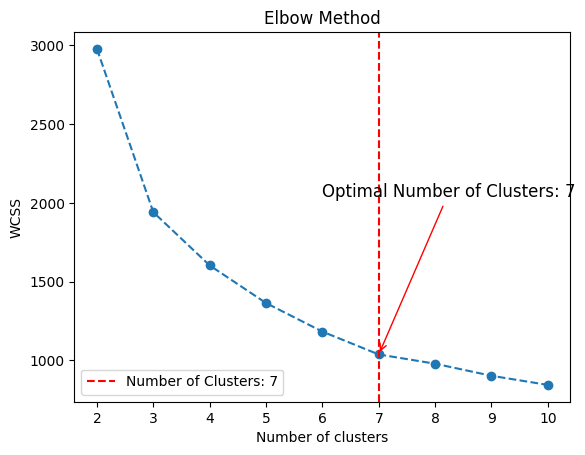

In [28]:
wcss = []
range_n_clusters = range(2, 11)
for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i,
                init=grid_search.best_params_['init'],
                max_iter=grid_search.best_params_['max_iter'],
                tol=grid_search.best_params_['tol'],
                algorithm=grid_search.best_params_['algorithm'],
                random_state=42
                )
    kmeans.fit(airline)
    wcss.append(kmeans.inertia_)

    cluster_labels = kmeans.fit_predict(airline)
    silhouette_avg = silhouette_score(airline, cluster_labels)

    print(f'For n_clusters = {i}, the average silhouette score is : {round(silhouette_avg, 2)}')

plt.plot(range(2, 11), wcss, marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Add a vertical line indicating the number of clusters
n_clusters_g = grid_search.best_params_['n_clusters']
plt.axvline(x=n_clusters_g, linestyle='--', color='red', label=f'Number of Clusters: {7}')
plt.annotate(f'Optimal Number of Clusters: {7}', xy=(7, wcss[5]), xytext=(6, wcss[5]+1000),
            arrowprops=dict(arrowstyle='->',lw=1, color='red'), fontsize=12)
plt.legend()
plt.show()

In [29]:
kmeans = KMeans(n_clusters = 7,
                init=grid_search.best_params_['init'],
                max_iter=grid_search.best_params_['max_iter'],
                tol=grid_search.best_params_['tol'],
                algorithm=grid_search.best_params_['algorithm'],
                random_state=42
                )

In [30]:
kmeans.fit(airline)

KMeans(algorithm='auto', init='random', max_iter=100, n_clusters=7,
       random_state=42, tol=0.01)

In [31]:
#create a new data frame with the original features and add a new column with the assigned clusters for each point.
air_segm_kmeans = airline.copy()
air_segm_kmeans['Segment K-means'] = kmeans.labels_
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [32]:
# Calculate mean values for the clusters
air_segm_analysis = air_segm_kmeans.groupby(['Segment K-means']).mean()
air_segm_analysis

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Segment K-means                                                          
0               -0.535574   -0.186299   1.007160        1.0        1.0   
1               -0.455164   -0.186299   1.007874        1.0        1.0   
2                0.049340   -0.186299   3.261364        1.0        1.0   
3               -0.352886   -0.186299   1.304762        1.0        1.0   
4               -0.430850   -0.186299   1.013889        1.0        1.0   
5                0.179872   -0.186299   3.392265        1.0        1.0   
6               -0.147485   -0.186299   1.372973        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Segment K-means                                                                 
0                  -0.646979    -0.960408          -0.328603        -0.362168   
1                  -0.663339    -1.005256          -0.328603        -0.362168   
2                   0.268506     0.412450          -0.328603        -0.362168   
3                  -0.434844     0.436687          -0.328603        -0.362168   
4                  -0.640239    -0.930211          -0.328603        -0.362168   
5                   0.323942     0.365380          -0.328603        -0.362168   
6                  -0.457849     0.183311          -0.328603        -0.362168   

                 Days_since_enroll  Award?  
Segment K-means                             
0                        -1.313782     0.0  
1                         1.104769     0.0  
2                        -0.667354     0.0  
3                        -0.940133     0.0  
4                        -0.178766     0.0  
5                         0.905553     0.0  
6                         0.786861     0.0

In [33]:
# Compute the size and proportions of the four clusters
air_segm_analysis['N Obs'] = air_segm_kmeans.groupby(['Segment K-means']).size()
air_segm_analysis['Prop Obs'] = round((air_segm_analysis['N Obs'] / air_segm_analysis['N Obs'].sum())*100,2)
air_segm_analysis

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Segment K-means                                                          
0               -0.535574   -0.186299   1.007160        1.0        1.0   
1               -0.455164   -0.186299   1.007874        1.0        1.0   
2                0.049340   -0.186299   3.261364        1.0        1.0   
3               -0.352886   -0.186299   1.304762        1.0        1.0   
4               -0.430850   -0.186299   1.013889        1.0        1.0   
5                0.179872   -0.186299   3.392265        1.0        1.0   
6               -0.147485   -0.186299   1.372973        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Segment K-means                                                                 
0                  -0.646979    -0.960408          -0.328603        -0.362168   
1                  -0.663339    -1.005256          -0.328603        -0.362168   
2                   0.268506     0.412450          -0.328603        -0.362168   
3                  -0.434844     0.436687          -0.328603        -0.362168   
4                  -0.640239    -0.930211          -0.328603        -0.362168   
5                   0.323942     0.365380          -0.328603        -0.362168   
6                  -0.457849     0.183311          -0.328603        -0.362168   

                 Days_since_enroll  Award?  N Obs  Prop Obs  
Segment K-means                                              
0                        -1.313782     0.0    419     23.47  
1                         1.104769     0.0    254     14.23  
2                        -0.667354     0.0    176      9.86  
3                        -0.940133     0.0    210     11.76  
4                        -0.178766     0.0    360     20.17  
5                         0.905553     0.0    181     10.14  
6                         0.786861     0.0    185     10.36

In [34]:
air_segm_analysis = air_segm_analysis.rename({0:'Bronze',
                         1:'Silver',
                         2:'Gold',
                         3:'Platinum',
                         4:'Diamond',
                         5:'Titanium',
                         6:'Sapphire'})
air_segm_analysis

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Segment K-means                                                          
Bronze          -0.535574   -0.186299   1.007160        1.0        1.0   
Silver          -0.455164   -0.186299   1.007874        1.0        1.0   
Gold             0.049340   -0.186299   3.261364        1.0        1.0   
Platinum        -0.352886   -0.186299   1.304762        1.0        1.0   
Diamond         -0.430850   -0.186299   1.013889        1.0        1.0   
Titanium         0.179872   -0.186299   3.392265        1.0        1.0   
Sapphire        -0.147485   -0.186299   1.372973        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Segment K-means                                                                 
Bronze             -0.646979    -0.960408          -0.328603        -0.362168   
Silver             -0.663339    -1.005256          -0.328603        -0.362168   
Gold                0.268506     0.412450          -0.328603        -0.362168   
Platinum           -0.434844     0.436687          -0.328603        -0.362168   
Diamond            -0.640239    -0.930211          -0.328603        -0.362168   
Titanium            0.323942     0.365380          -0.328603        -0.362168   
Sapphire           -0.457849     0.183311          -0.328603        -0.362168   

                 Days_since_enroll  Award?  N Obs  Prop Obs  
Segment K-means                                              
Bronze                   -1.313782     0.0    419     23.47  
Silver                    1.104769     0.0    254     14.23  
Gold                     -0.667354     0.0    176      9.86  
Platinum                 -0.940133     0.0    210     11.76  
Diamond                  -0.178766     0.0    360     20.17  
Titanium                  0.905553     0.0    181     10.14  
Sapphire                  0.786861     0.0    185     10.36

### 1. **Cluster Distribution and Sizes**:
   - **Bronze (23.47%)**: This is the largest segment with 419 observations, indicating that a significant portion of the data falls into this cluster.
   - **Diamond (20.17%)**: The second-largest cluster with 360 observations, suggesting another common pattern within the dataset.
   - **Silver (14.23%)**: Contains 254 observations.
   - **Platinum (11.76%)**: Contains 210 observations.
   - **Sapphire (10.36%)**: Contains 185 observations.
   - **Titanium (10.14%)**: Contains 181 observations.
   - **Gold (9.86%)**: The smallest cluster with 176 observations, representing the least common pattern among the data points.

### 2. **Feature Insights by Cluster**:
   - **cc2_miles and cc3_miles**: Both features are constant across all clusters, suggesting they do not significantly influence the clustering.
   - **Bonus_miles**:
     - **Titanium** and **Gold** clusters have the highest average bonus miles, with values significantly above 3. This suggests these groups might include members who accumulate higher bonus miles.
     - **Bronze**, **Silver**, **Platinum**, **Diamond**, and **Sapphire** clusters have similar lower average bonus miles, indicating these members accumulate fewer bonus miles.
   - **Bonus_trans**:
     - All clusters have a constant value of `1.0`, indicating no variation in the number of bonus transactions across clusters.
   - **Flight_miles_12mo and Flight_trans_12**:
     - These features are also constant across all clusters, implying that the number of flight miles and transactions in the last 12 months do not differentiate the clusters.
   - **Days_since_enroll**:
     - **Silver** cluster has the highest average value, suggesting members in this segment have been enrolled for the longest time.
     - **Bronze** and **Platinum** clusters have the most negative average values, indicating shorter enrollment periods for these groups.
   - **Award**:
     - The `Award` feature is `0` across all clusters, indicating that no members in any cluster have earned awards. This feature is not distinguishing the clusters in this dataset.

### 3. **Cluster-Specific Characteristics**:
   - **Bronze Cluster**:
     - This is the largest cluster and shows generally low values for most features. It might represent a group with standard or less engaged members.
   - **Silver Cluster**:
     - Although the second largest, it has the longest average enrollment duration, suggesting loyal or long-term members. However, other features like bonus miles are lower compared to Titanium and Gold.
   - **Gold Cluster**:
     - Members of this cluster accumulate the most bonus miles but represent a smaller, more exclusive group. This cluster might represent high-value customers.
   - **Platinum Cluster**:
     - Similar to Bronze but with slightly higher values for bonus miles and transactions, indicating moderately active members.
   - **Diamond Cluster**:
     - Another large cluster with average values across most features, possibly indicating a diverse but typical group.
   - **Titanium Cluster**:
     - High bonus miles and relatively high days since enrollment suggest valuable and possibly long-term customers.
   - **Sapphire Cluster**:
     - Slightly higher days since enrollment and moderate bonus miles suggest members who have been around for a while but are not the highest earners of bonus miles.

In [35]:
# Add the segment labels to table
air_segm_kmeans['Labels'] = air_segm_kmeans['Segment K-means'].map({0:'Bronze',
                         1:'Silver',
                         2:'Gold',
                         3:'Platinum',
                         4:'Diamond',
                         5:'Titanium',
                         6:'Sapphire'})
air_segm_kmeans.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299          1          1          1    -0.702786   
1 -0.539457   -0.186299          1          1          1    -0.701088   
2 -0.320031   -0.186299          1          1          1    -0.539253   
3 -0.583799   -0.186299          1          1          1    -0.689286   
5 -0.567483   -0.186299          1          1          1    -0.709992   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0    -1.104065          -0.328603        -0.362168           1.395454       0   
1    -0.999926          -0.328603        -0.362168           1.379957       0   
2    -0.791649          -0.328603        -0.362168           1.411920       0   
3    -1.104065          -0.328603        -0.362168           1.372208       0   
5    -1.208203          -0.328603        -0.362168           1.367365       0   

   Segment K-means  Labels  
0                1  Silver  
1                1  Silver  
2                1  Silver  
3                1  Silver  
5                1  Silver

In [44]:
import plotly.express as px

# Create a 3D scatter plot with your specific dataset
fig = px.scatter_3d(air_segm_kmeans,
                    x='Balance',
                    y='Qual_miles',
                    z='Days_since_enroll',
                    color='Labels',
                    symbol='Labels',
                    opacity=0.7,
                    size_max=10)

# Update layout with a customized title and axis labels
fig.update_layout(
    title={
        'text': "EastWest Airlines Customer Segmentation",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    scene=dict(
        xaxis=dict(title='Balance'),
        yaxis=dict(title='Qualify Miles'),
        zaxis=dict(title='Days Since Enroll')),
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))

# Display the plot
fig.show()


In [37]:
# Define parameter ranges
eps_range = np.arange(0.1, 1.0, 0.1)
min_samples_range = range(2, 10)

# Initialize variables to store the best results
best_score = -1
best_eps = None
best_min_samples = None

# Iterate over all combinations of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        # Fit DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(airline)

        # Calculate silhouette score if clusters are found
        if len(set(labels)) > 1:  # Silhouette score requires at least 2 clusters
            score = silhouette_score(airline, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Display the best parameters and corresponding score
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best Silhouette Score: {best_score}")

Best eps: 0.8
Best min_samples: 9
Best Silhouette Score: 0.2440851425574214


In [38]:
dbscan = DBSCAN(eps=0.8, min_samples=9)

# fit the data
dbscan.fit(airline)

DBSCAN(eps=0.8, min_samples=9)

In [39]:
#create a new data frame with the original features and add a new column with the assigned clusters for each point.
air_segm_db = airline.copy()
air_segm_db['Segment DBSCAN'] = dbscan.labels_

In [40]:
# Calculate mean values for the clusters
air_segm_analysis = air_segm_db.groupby(['Segment DBSCAN']).mean()
air_segm_analysis

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Segment DBSCAN                                                          
-1              0.391712   -0.186299   2.235294        1.0        1.0   
 0             -0.456640   -0.186299   1.000000        1.0        1.0   
 1             -0.116481   -0.186299   2.000000        1.0        1.0   
 2              0.044981   -0.186299   3.000000        1.0        1.0   
 3              0.241927   -0.186299   4.000000        1.0        1.0   

                Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Segment DBSCAN                                                                 
-1                 0.154220     1.082841          -0.328603        -0.362168   
 0                -0.625531    -0.696467          -0.328603        -0.362168   
 1                -0.321045     0.132395          -0.328603        -0.362168   
 2                 0.048803     0.307689          -0.328603        -0.362168   
 3                 0.782984     0.466022          -0.328603        -0.362168   

                Days_since_enroll  Award?  
Segment DBSCAN                             
-1                       0.034997     0.0  
 0                      -0.300402     0.0  
 1                      -0.023080     0.0  
 2                       0.046400     0.0  
 3                       0.312796     0.0

In [41]:
cluster_names = {
    0: "Travelers",
    1: "Loyalists",
    2: "Occasional Flyers",
    3: "Big Spenders",
    -1: "Newcomers"
}
air_segm_db['Cluster_Name'] = air_segm_db['Segment DBSCAN'].map(cluster_names)
air_segm_db.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299          1          1          1    -0.702786   
1 -0.539457   -0.186299          1          1          1    -0.701088   
2 -0.320031   -0.186299          1          1          1    -0.539253   
3 -0.583799   -0.186299          1          1          1    -0.689286   
5 -0.567483   -0.186299          1          1          1    -0.709992   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0    -1.104065          -0.328603        -0.362168           1.395454       0   
1    -0.999926          -0.328603        -0.362168           1.379957       0   
2    -0.791649          -0.328603        -0.362168           1.411920       0   
3    -1.104065          -0.328603        -0.362168           1.372208       0   
5    -1.208203          -0.328603        -0.362168           1.367365       0   

   Segment DBSCAN Cluster_Name  
0               0    Travelers  
1               0    Travelers  
2               0    Travelers  
3               0    Travelers  
5               0    Travelers

In [42]:
# Compute the size and proportions of the four clusters
air_segm_analysis['N Obs'] = air_segm_db.groupby(['Segment DBSCAN']).size()
air_segm_analysis['Prop Obs'] = round((air_segm_analysis['N Obs'] / air_segm_analysis['N Obs'].sum())*100,2)
air_segm_analysis

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Segment DBSCAN                                                          
-1              0.391712   -0.186299   2.235294        1.0        1.0   
 0             -0.456640   -0.186299   1.000000        1.0        1.0   
 1             -0.116481   -0.186299   2.000000        1.0        1.0   
 2              0.044981   -0.186299   3.000000        1.0        1.0   
 3              0.241927   -0.186299   4.000000        1.0        1.0   

                Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Segment DBSCAN                                                                 
-1                 0.154220     1.082841          -0.328603        -0.362168   
 0                -0.625531    -0.696467          -0.328603        -0.362168   
 1                -0.321045     0.132395          -0.328603        -0.362168   
 2                 0.048803     0.307689          -0.328603        -0.362168   
 3                 0.782984     0.466022          -0.328603        -0.362168   

                Days_since_enroll  Award?  N Obs  Prop Obs  
Segment DBSCAN                                              
-1                       0.034997     0.0     17      0.95  
 0                      -0.300402     0.0   1279     71.65  
 1                      -0.023080     0.0    142      7.96  
 2                       0.046400     0.0    230     12.89  
 3                       0.312796     0.0    117      6.55

# Clusters
* Cluster -1: DBSCAN assigns the label -1 to noise points, which are data points that don't belong to any cluster. In this dataset, there are 17 observations (0.95% of the data) identified as noise. These points may be outliers or points that don't fit well within any cluster based on the parameters used.
* Cluster 0: This is the largest cluster, containing 1,279 observations, which accounts for 71.65% of the data. The characteristics of this cluster can be considered the most common in the dataset.
* Cluster 1: Contains 142 observations (7.96% of the data).
* Cluster 2: Contains 230 observations (12.89% of the data).
* Cluster 3: Contains 117 observations (6.55% of the data).

In [45]:
# Create a 3D scatter plot with your specific dataset
fig = px.scatter_3d(air_segm_db,
                    x='Balance',
                    y='Qual_miles',
                    z='Days_since_enroll',
                    color='Cluster_Name',
                    symbol='Cluster_Name',
                    opacity=0.7,
                    size_max=10)

# Update layout with a customized title and axis labels
fig.update_layout(
    title={
        'text': "EastWest Airlines Customer Segmentation",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    scene=dict(
        xaxis=dict(title='Balance'),
        yaxis=dict(title='Qualify Miles'),
        zaxis=dict(title='Days Since Enroll')),
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))

# Display the plot
fig.show()